## Climate Change Impacts on Global Crop Yields

<p><strong>📌 Problem Statement</strong></p>

<p>
Climate change is increasingly affecting agricultural productivity and economic stability across different countries and regions.
Variations in temperature, precipitation, CO₂ emissions, extreme weather events, soil health, and farming practices make it
difficult to understand their combined impact on crop yield and economic loss.
There is a need for a data-driven model to analyze these factors and predict agricultural outcomes
to support better adaptation strategies and decision-making.
</p>

<br>

<p><strong>🎯 Goal of the Dataset</strong></p>

<p>
The goal of this dataset is to analyze and predict the impact of climate change on agriculture by studying how environmental
factors, farming practices, and adaptation strategies influence crop yield and economic impact across different countries
and regions.
</p>


<ul>
  <li><strong>Year</strong> – The year of the recorded agricultural and climate data (e.g., 2001–2024).</li>
  <li><strong>Country</strong> – The country where the crop is grown (e.g., India, USA, China).</li>
  <li><strong>Region</strong> – Sub-national or geographical region within the country (e.g., West Bengal, Midwest).</li>
  <li><strong>Crop_Type</strong> – Type of crop cultivated (e.g., Corn, Wheat, Rice, Coffee).</li>
  <li><strong>Average_Temperature_C</strong> – Annual average temperature in Celsius for that location/year.</li>
  <li><strong>Total_Precipitation_mm</strong> – Total annual rainfall in millimeters.</li>
  <li><strong>CO2_Emissions_MT</strong> – CO₂ emissions (metric tons) associated with agricultural activities in that record.</li>
  <li><strong>Crop_Yield_MT_per_HA</strong> – Crop production in metric tons per hectare (target variable for prediction/analysis).</li>
  <li><strong>Extreme_Weather_Events</strong> – Count of extreme weather events (e.g., droughts, floods) in that year.</li>
  <li><strong>Irrigation_Access_%</strong> – Percentage of cultivated area with access to irrigation.</li>
  <li><strong>Pesticide_Use_Kg_per_Ha</strong> – Pesticide application in kilograms per hectare.</li>
  <li><strong>Fertilizer_Use_Kg_per_Ha</strong> – Fertilizer application in kilograms per hectare.</li>
  <li><strong>Soil_Health_Index</strong> – Composite score indicating soil quality/health (higher values indicate better soil health).</li>
  <li><strong>Adaptation_Strategies</strong> – Farming adaptation method used (e.g., Drought-resistant Crops, Water Management, No Adaptation).</li>
  <li><strong>Economic_Impact_Million_USD</strong> – Estimated economic loss or gain (in million USD) due to climate effects on crop yield.</li>
</ul>


In [1]:
# for data wrangling
import numpy as np
import pandas as pd


# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score ,classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR

# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection 
#from sklearn.utils import class_weight
#from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

In [2]:
df=pd.read_csv("finance/climate_change_impact_on_agriculture_2024.csv")
# finance/climate_change_impact_on_agriculture_2024.csv

In [3]:
df

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90


data

https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture/code

### basic understanding of data

In [4]:
df.shape

(10000, 15)

In [5]:
df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [6]:
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [8]:
df.duplicated().sum()

0

#### visualize the data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

from typing import List 
def display(col_names:List[str]):
    for col_name in col_names:
        print("-"*30)
        print(f"column:{col_name}")
        print("-"*30)
        print("datatype :",df[col_name].dtype)
        print("null values",df[col_name].isnull().sum())
        print(df[col_name].describe())
        if df[col_name].nunique()<10:
            print("nunique",df[col_name].nunique())
            print(df[col_name].value_counts())
        else:
            print("frequency table not displyed,there are",df[col_name].nunique(),"unique values")
display(df.columns)

------------------------------
column:Year
------------------------------
datatype : int64
null values 0
count    10000.000000
mean      2007.088700
std         10.084245
min       1990.000000
25%       1999.000000
50%       2007.000000
75%       2016.000000
max       2024.000000
Name: Year, dtype: float64
frequency table not displyed,there are 35 unique values
------------------------------
column:Country
------------------------------
datatype : object
null values 0
count     10000
unique       10
top         USA
freq       1032
Name: Country, dtype: object
frequency table not displyed,there are 10 unique values
------------------------------
column:Region
------------------------------
datatype : object
null values 0
count     10000
unique       34
top       South
freq        754
Name: Region, dtype: object
frequency table not displyed,there are 34 unique values
------------------------------
column:Crop_Type
------------------------------
datatype : object
null values 0
count     1

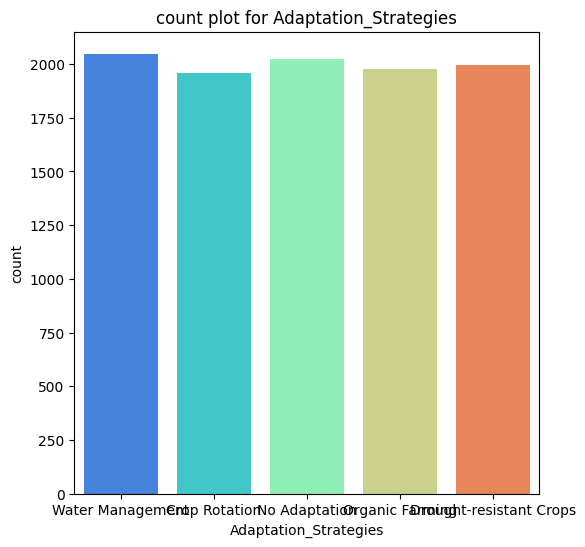

In [10]:
colmns=df.select_dtypes(include=['object']).columns.tolist()
for col in colmns[1:]:
    if df[col].nunique()<10:
        plt.figure(figsize=(6,6))
        sn.countplot(data=df,x=col,hue=col,palette='rainbow')
        plt.title(f"count plot for {col}")
        plt.show()

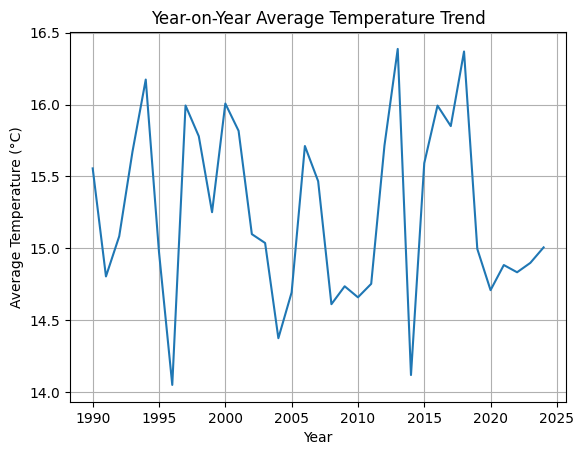

In [11]:
# Group by year (important!)
yearly_temp = df.groupby("Year")["Average_Temperature_C"].mean()

plt.figure()
yearly_temp.plot(kind='line')
plt.xlabel("Year")
plt.grid(True)
plt.ylabel("Average Temperature (°C)")
plt.title("Year-on-Year Average Temperature Trend")
plt.show()

The plot indicates a gradual increase in average annual temperature over time, with noticeable year-to-year variability, suggesting long-term warming driven by climate change

### feature enginnering

In [12]:
df['Year'].unique()

array([2001, 2024, 1998, 2019, 1997, 2021, 2012, 2018, 2006, 1993, 2003,
       1999, 1990, 2017, 2015, 2000, 2016, 1996, 2010, 2002, 2011, 1995,
       2004, 2008, 2005, 2020, 1994, 1991, 2022, 2007, 1992, 2013, 2023,
       2014, 2009], dtype=int64)

In [13]:
# ================================
# REGION FEATURE ENGINEERING (4 GROUPS)
# ================================

def group_region(region):
    r = str(region).lower()

    # NORTH
    if r in [
        'north', 'northeast', 'north west', 'northwest', 'northwestern',
        'north central', 'siberian', 'quebec', 'ontario', 'british columbia',
        'punjab'
    ]:
        return 'North'

    # SOUTH
    elif r in [
        'south', 'south east', 'southeast', 'south west',
        'tamil nadu', 'maharashtra', 'victoria',
        'new south wales', 'queensland',
        'provence-alpes-cote d’azur'
    ]:
        return 'South'

    # EAST
    elif r in [
        'east', 'west bengal',
        'ile-de-france', 'grand est',
        'nouvelle-aquitaine'
    ]:
        return 'East'

    # WEST
    elif r in [
        'west', 'midwest', 'prairies', 'pampas',
        'western australia', 'volga', 'patagonia', 'central'
    ]:
        return 'West'

    else:
        return 'West'   # safe fallback

# Apply grouping
df['Region_Group'] = df['Region'].apply(group_region)

# Drop original column (optional)
df.drop('Region', axis=1, inplace=True)

# Verify result
print(df['Region_Group'].value_counts())


Region_Group
North    3524
South    3021
West     2173
East     1282
Name: count, dtype: int64


In [14]:
df['Decade'] = (df['Year'] // 10) * 10
# df['Year_sq'] = df['Year'] ** 2

In [15]:
df['Soil_Yield_Interaction'] = (
    df['Soil_Health_Index'] * df['Crop_Yield_MT_per_HA']
)

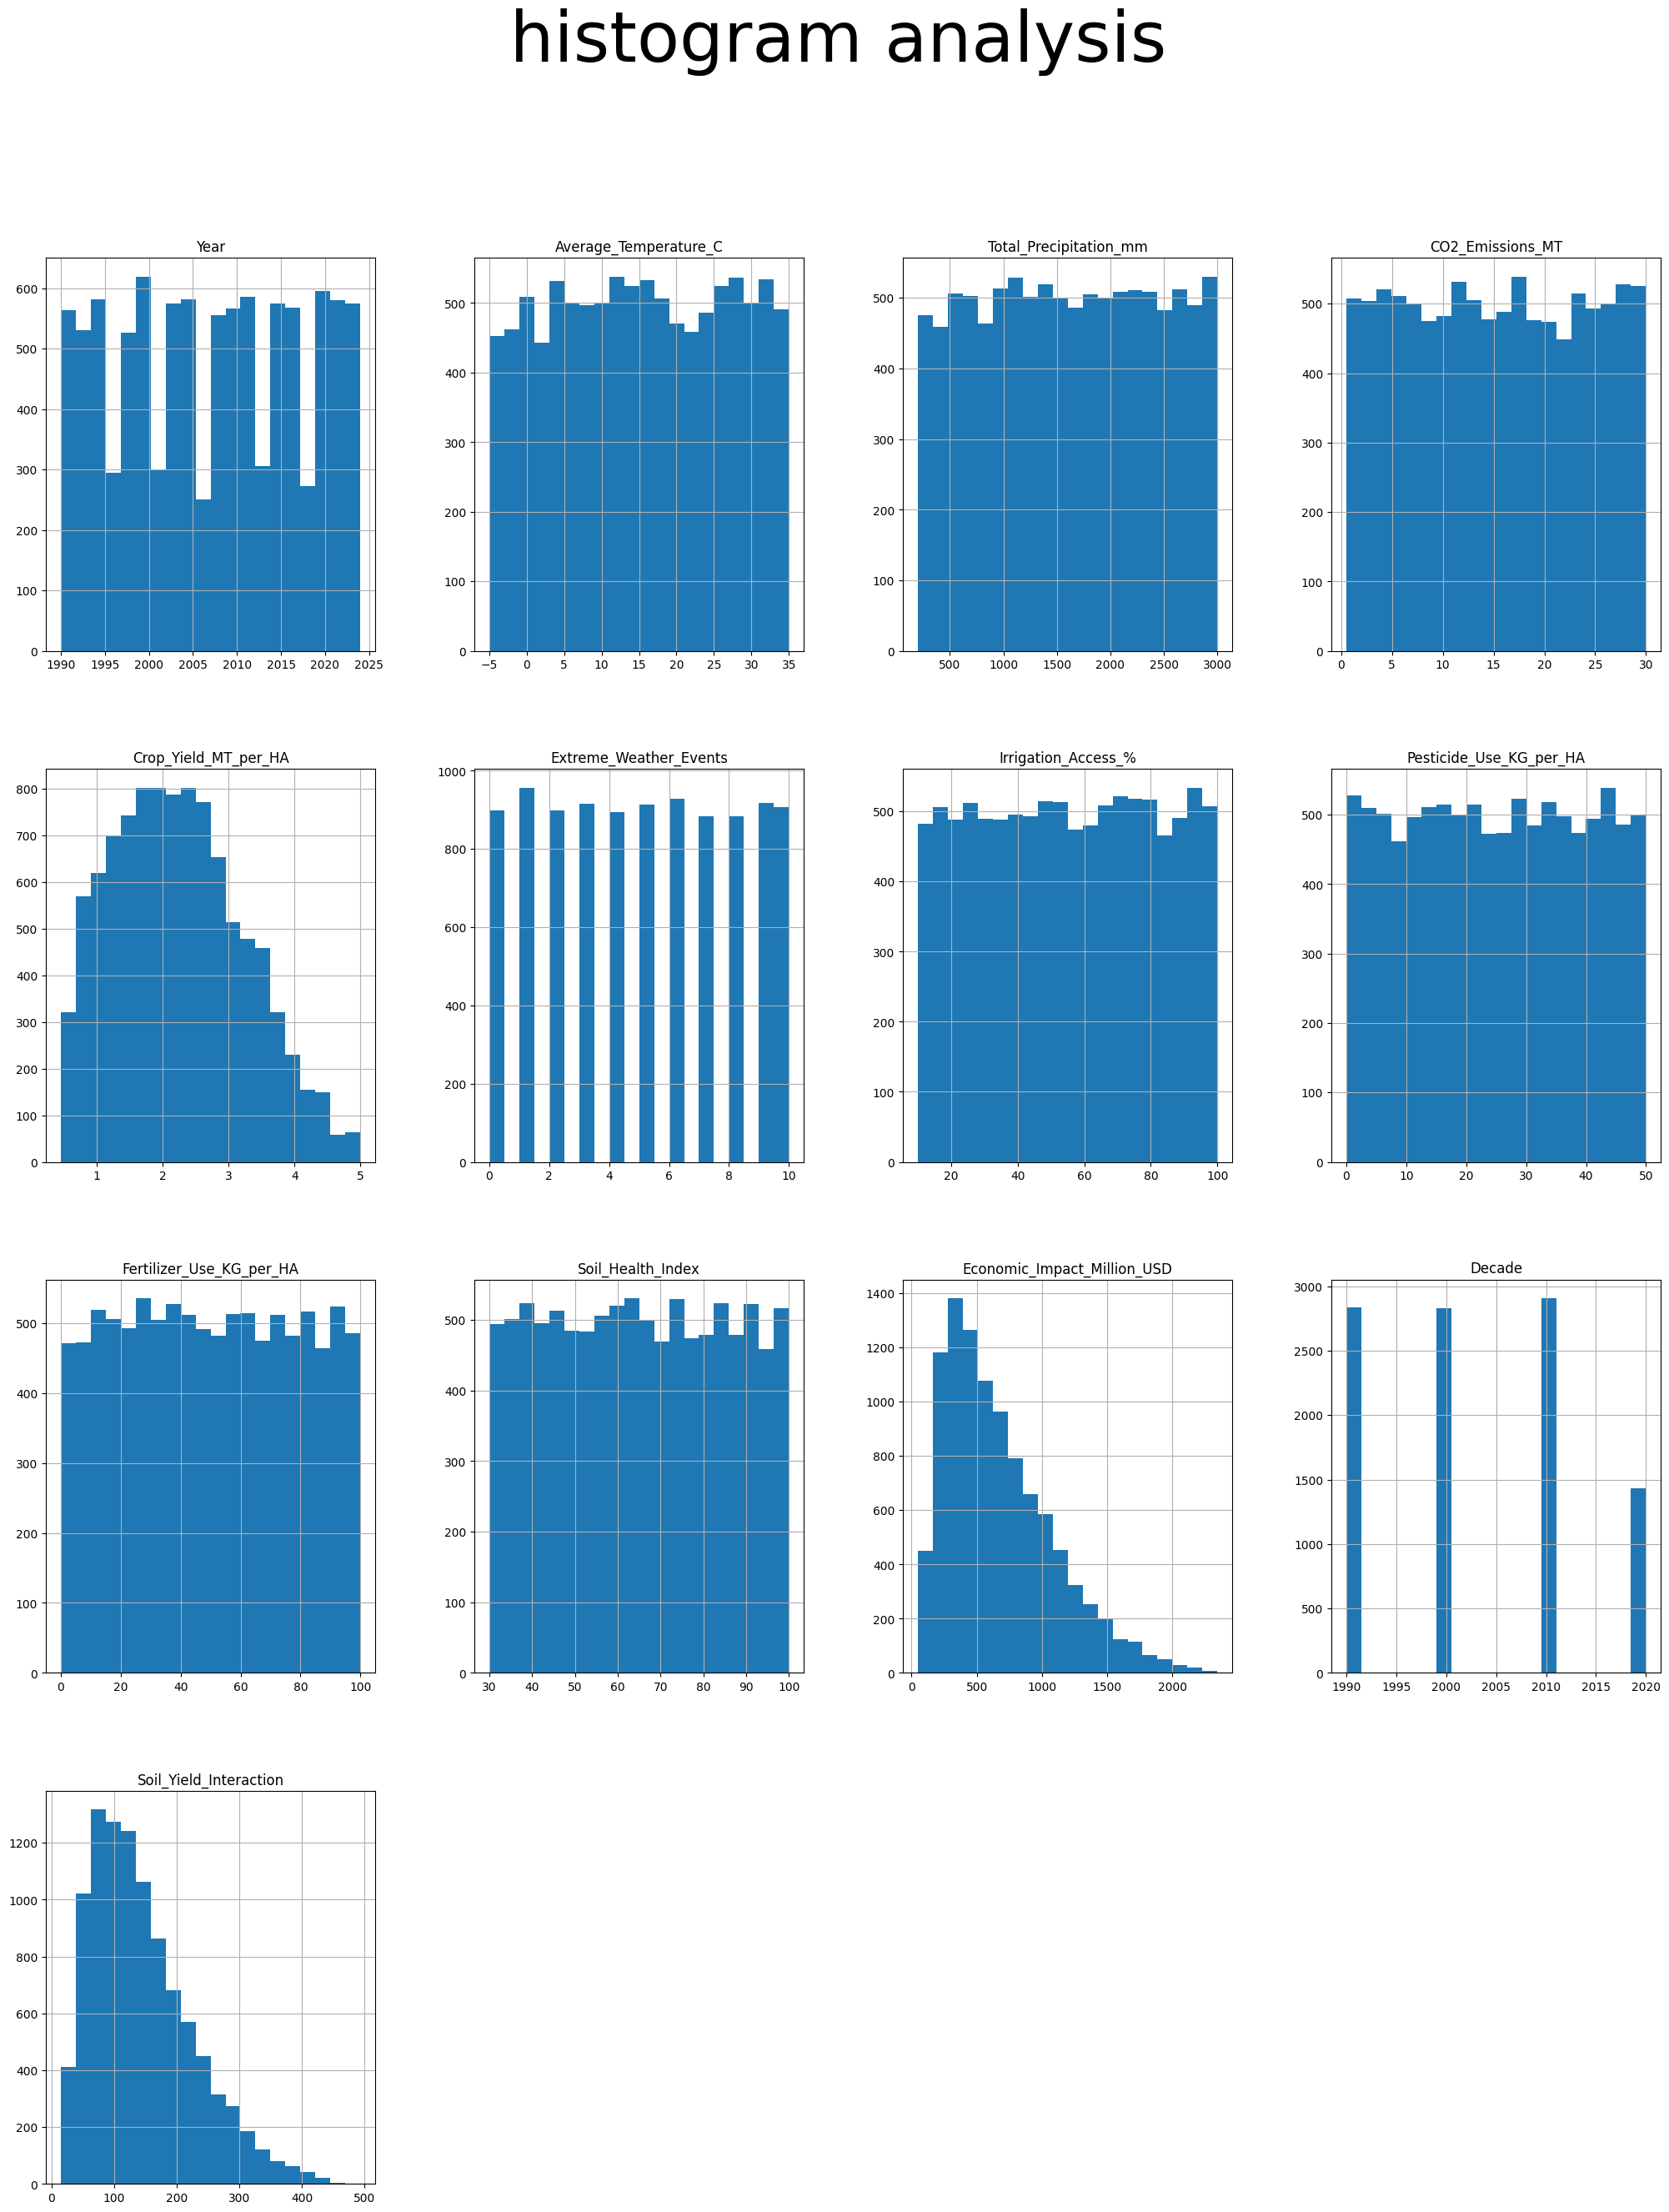

In [16]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle(' histogram analysis',fontsize=60)
plt.show()

## handel skewed data

In [17]:
# crete a copy of the original data for comparison
df_copy=df.copy()
# log trasformation od skewed columns
df['Soil_Yield_Interaction']=np.log1p(df['Soil_Yield_Interaction'])
df['Economic_Impact_Million_USD']=np.log1p(df['Economic_Impact_Million_USD'])

### Check Again After Transformation

Text(0.5, 1.0, ' after log')

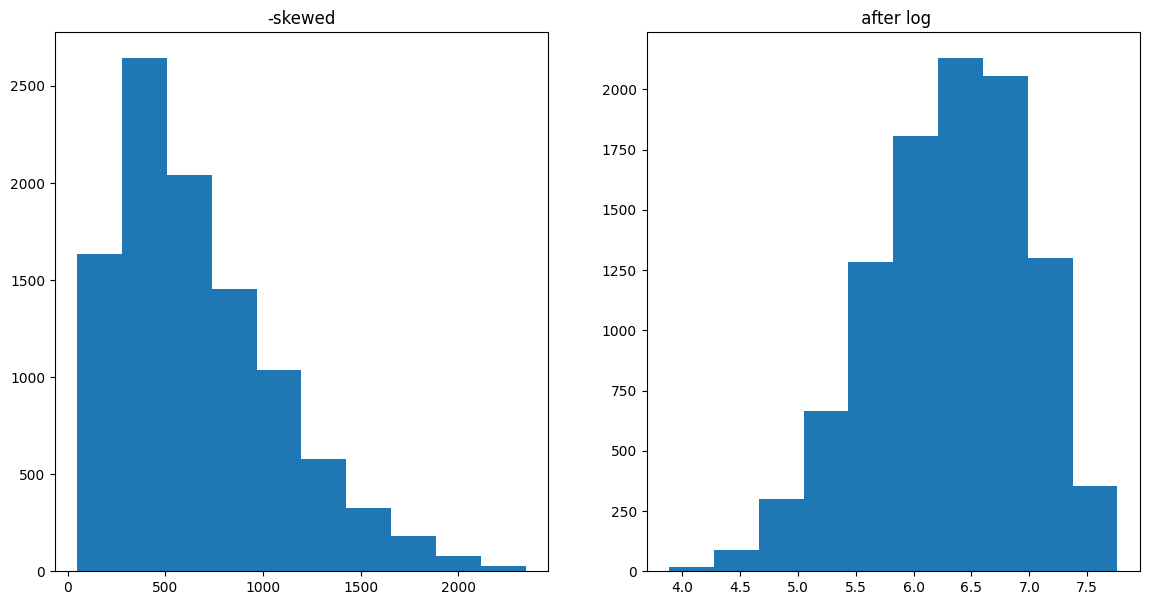

In [18]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
a=plt.hist(df_copy['Economic_Impact_Million_USD'])
plt.title('-skewed')
  
ax2=plt.subplot(1,2,2)
plt.hist(df['Economic_Impact_Million_USD'])
plt.title(" after log")

<Axes: >

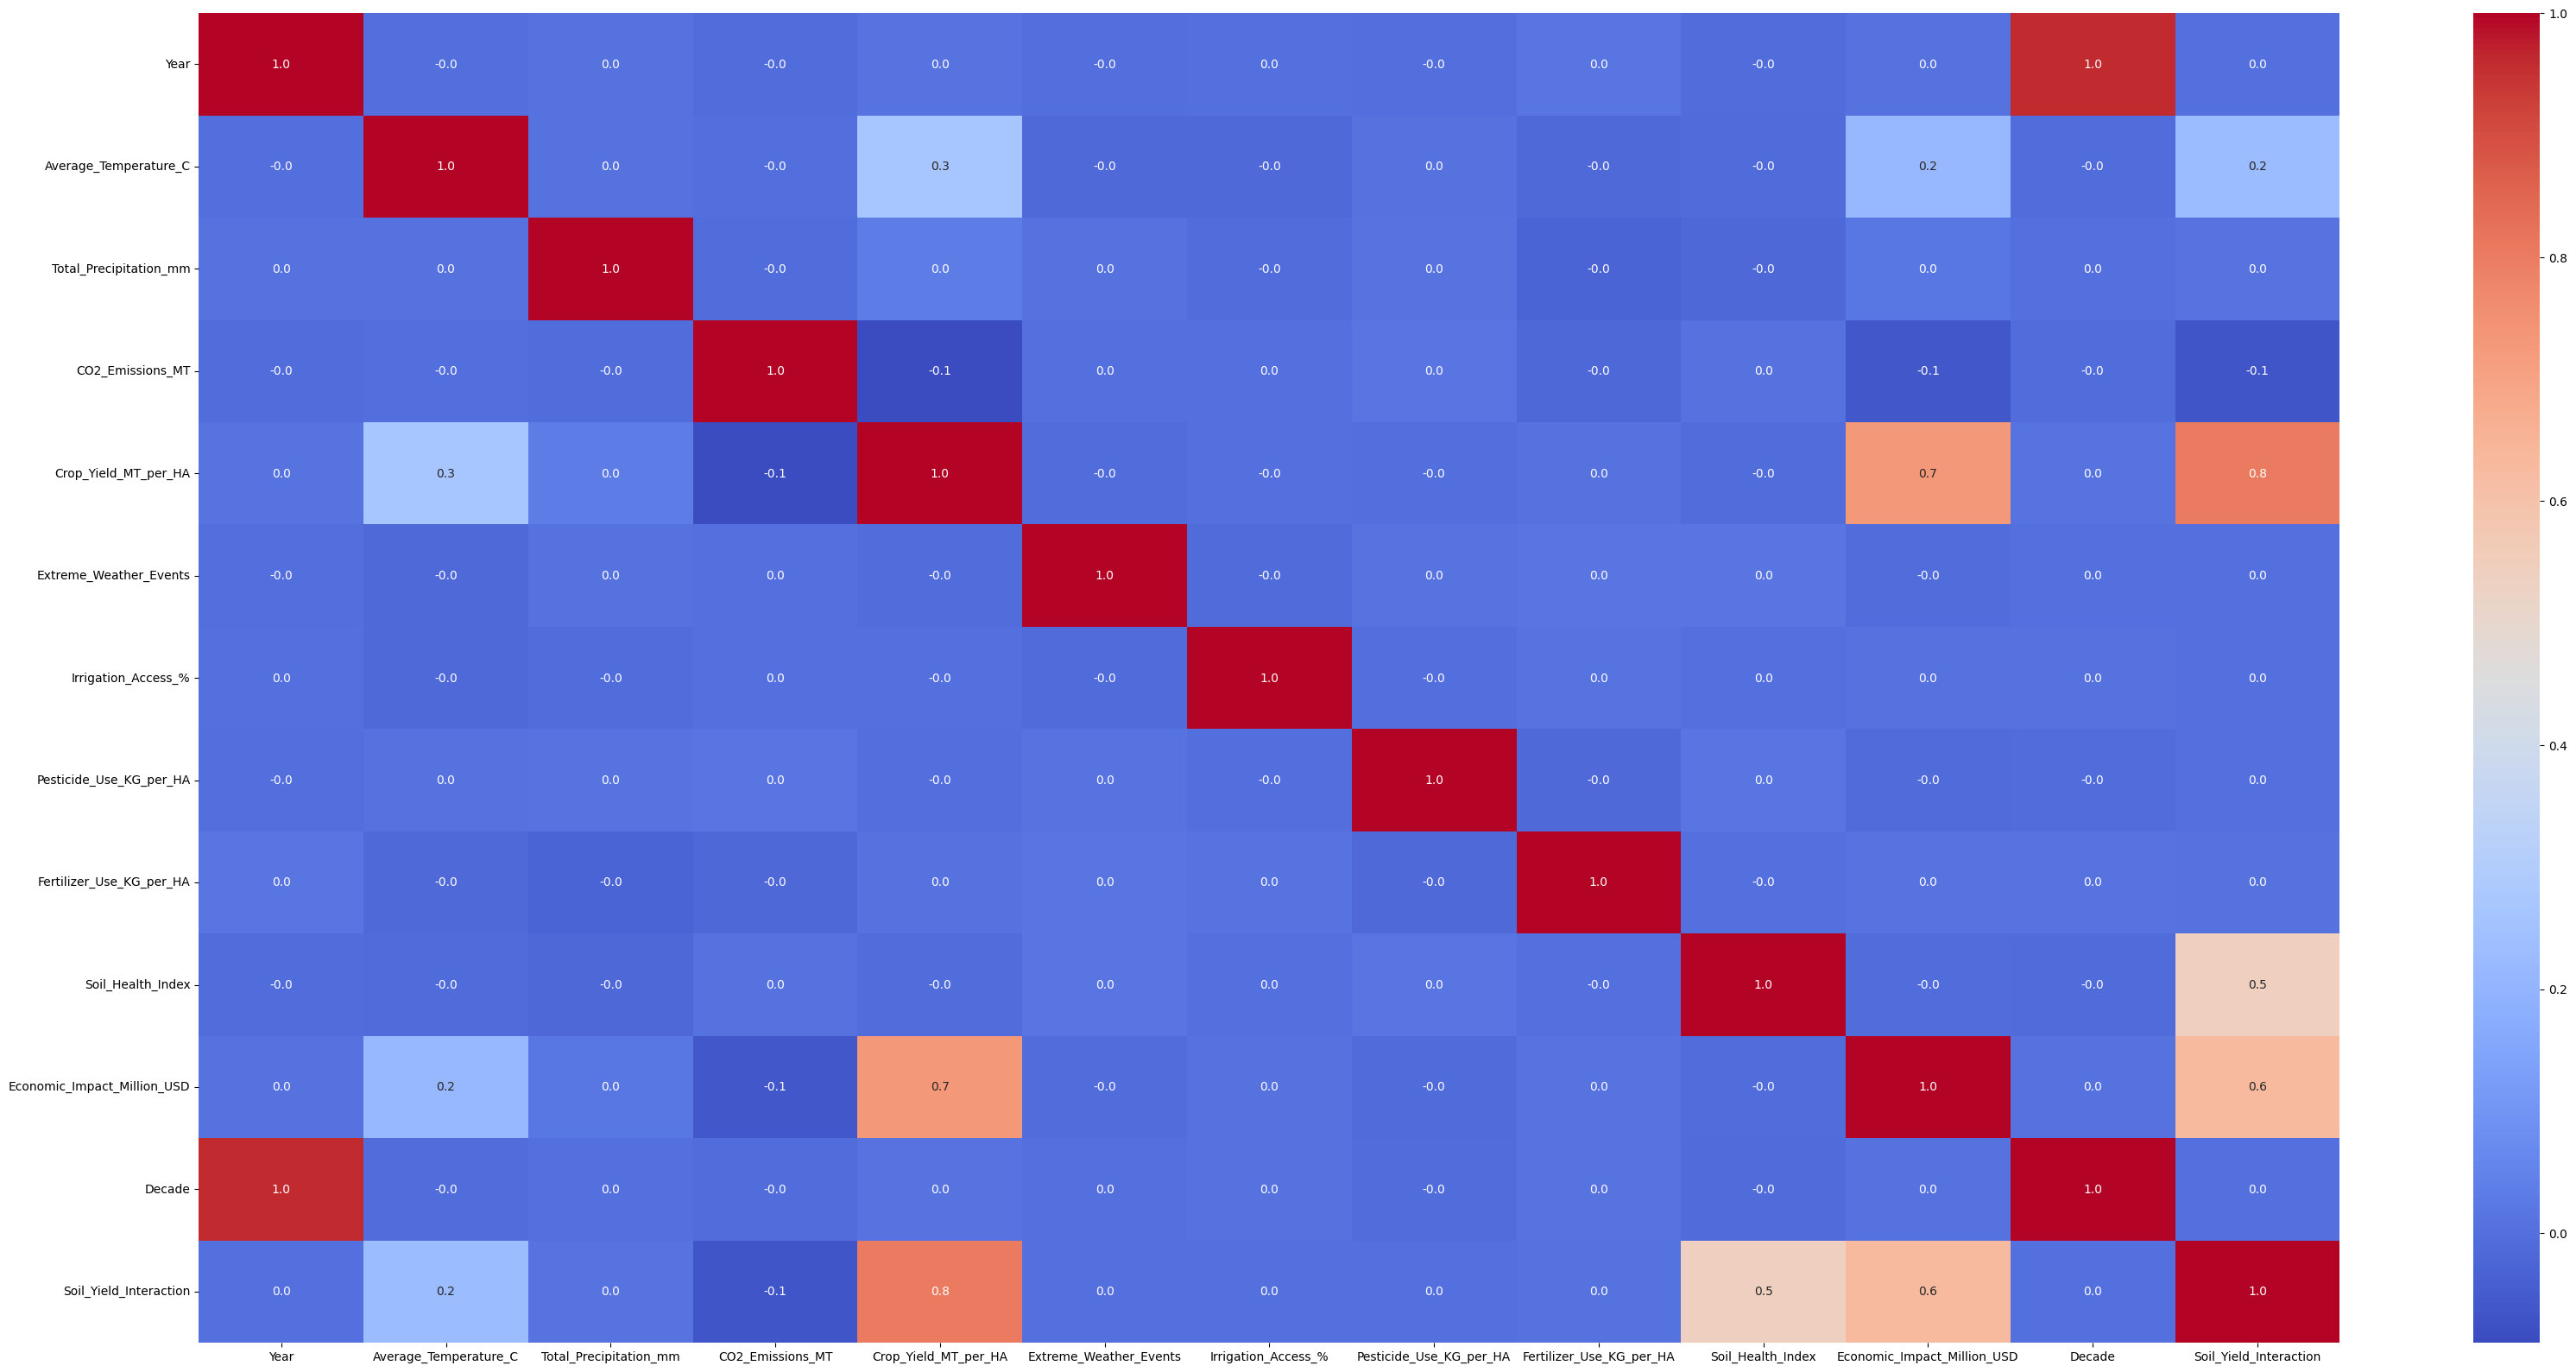

In [19]:
plt.figure(figsize=(40,20))
df.corr(numeric_only=True)
sn.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f')

In [20]:
df.drop(['Soil_Yield_Interaction','Decade'],axis=1,inplace=True)

## encoding


#### lable encoding


In [21]:
label_encoder=LabelEncoder()
df["Crop_Type"]=label_encoder.fit_transform(df["Crop_Type"]) 

In [22]:
label_encoder=LabelEncoder()
df['Region_Group']=label_encoder.fit_transform(df['Region_Group']) 

In [23]:
label_encoder=LabelEncoder()
df["Country"]=label_encoder.fit_transform(df["Country"]) 

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  int32  
 2   Crop_Type                    10000 non-null  int32  
 3   Average_Temperature_C        10000 non-null  float64
 4   Total_Precipitation_mm       10000 non-null  float64
 5   CO2_Emissions_MT             10000 non-null  float64
 6   Crop_Yield_MT_per_HA         10000 non-null  float64
 7   Extreme_Weather_Events       10000 non-null  int64  
 8   Irrigation_Access_%          10000 non-null  float64
 9   Pesticide_Use_KG_per_HA      10000 non-null  float64
 10  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 11  Soil_Health_Index            10000 non-null  float64
 12  Adaptation_Strategies        10000 non-null  object 
 13  Economic_Impact_M

#### one hot encoding

In [25]:
df = pd.get_dummies(df, columns=['Adaptation_Strategies'], drop_first=True)
df['Adaptation_Strategies'] = df['Adaptation_Strategies'].astype(int)

KeyError: 'Adaptation_Strategies'

In [ ]:
corr=df.corr()
threshold=0.5 
highly_correlated_pairs=[]
for i in range(len(corr)):
    for j in range(i):
        if abs(corr.iloc[i,j])>threshold:
            highly_correlated_pairs.append((corr.columns[i],corr.columns[j]))
highly_correlated_pairs 

[('Economic_Impact_Million_USD', 'Crop_Yield_MT_per_HA')]

## boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

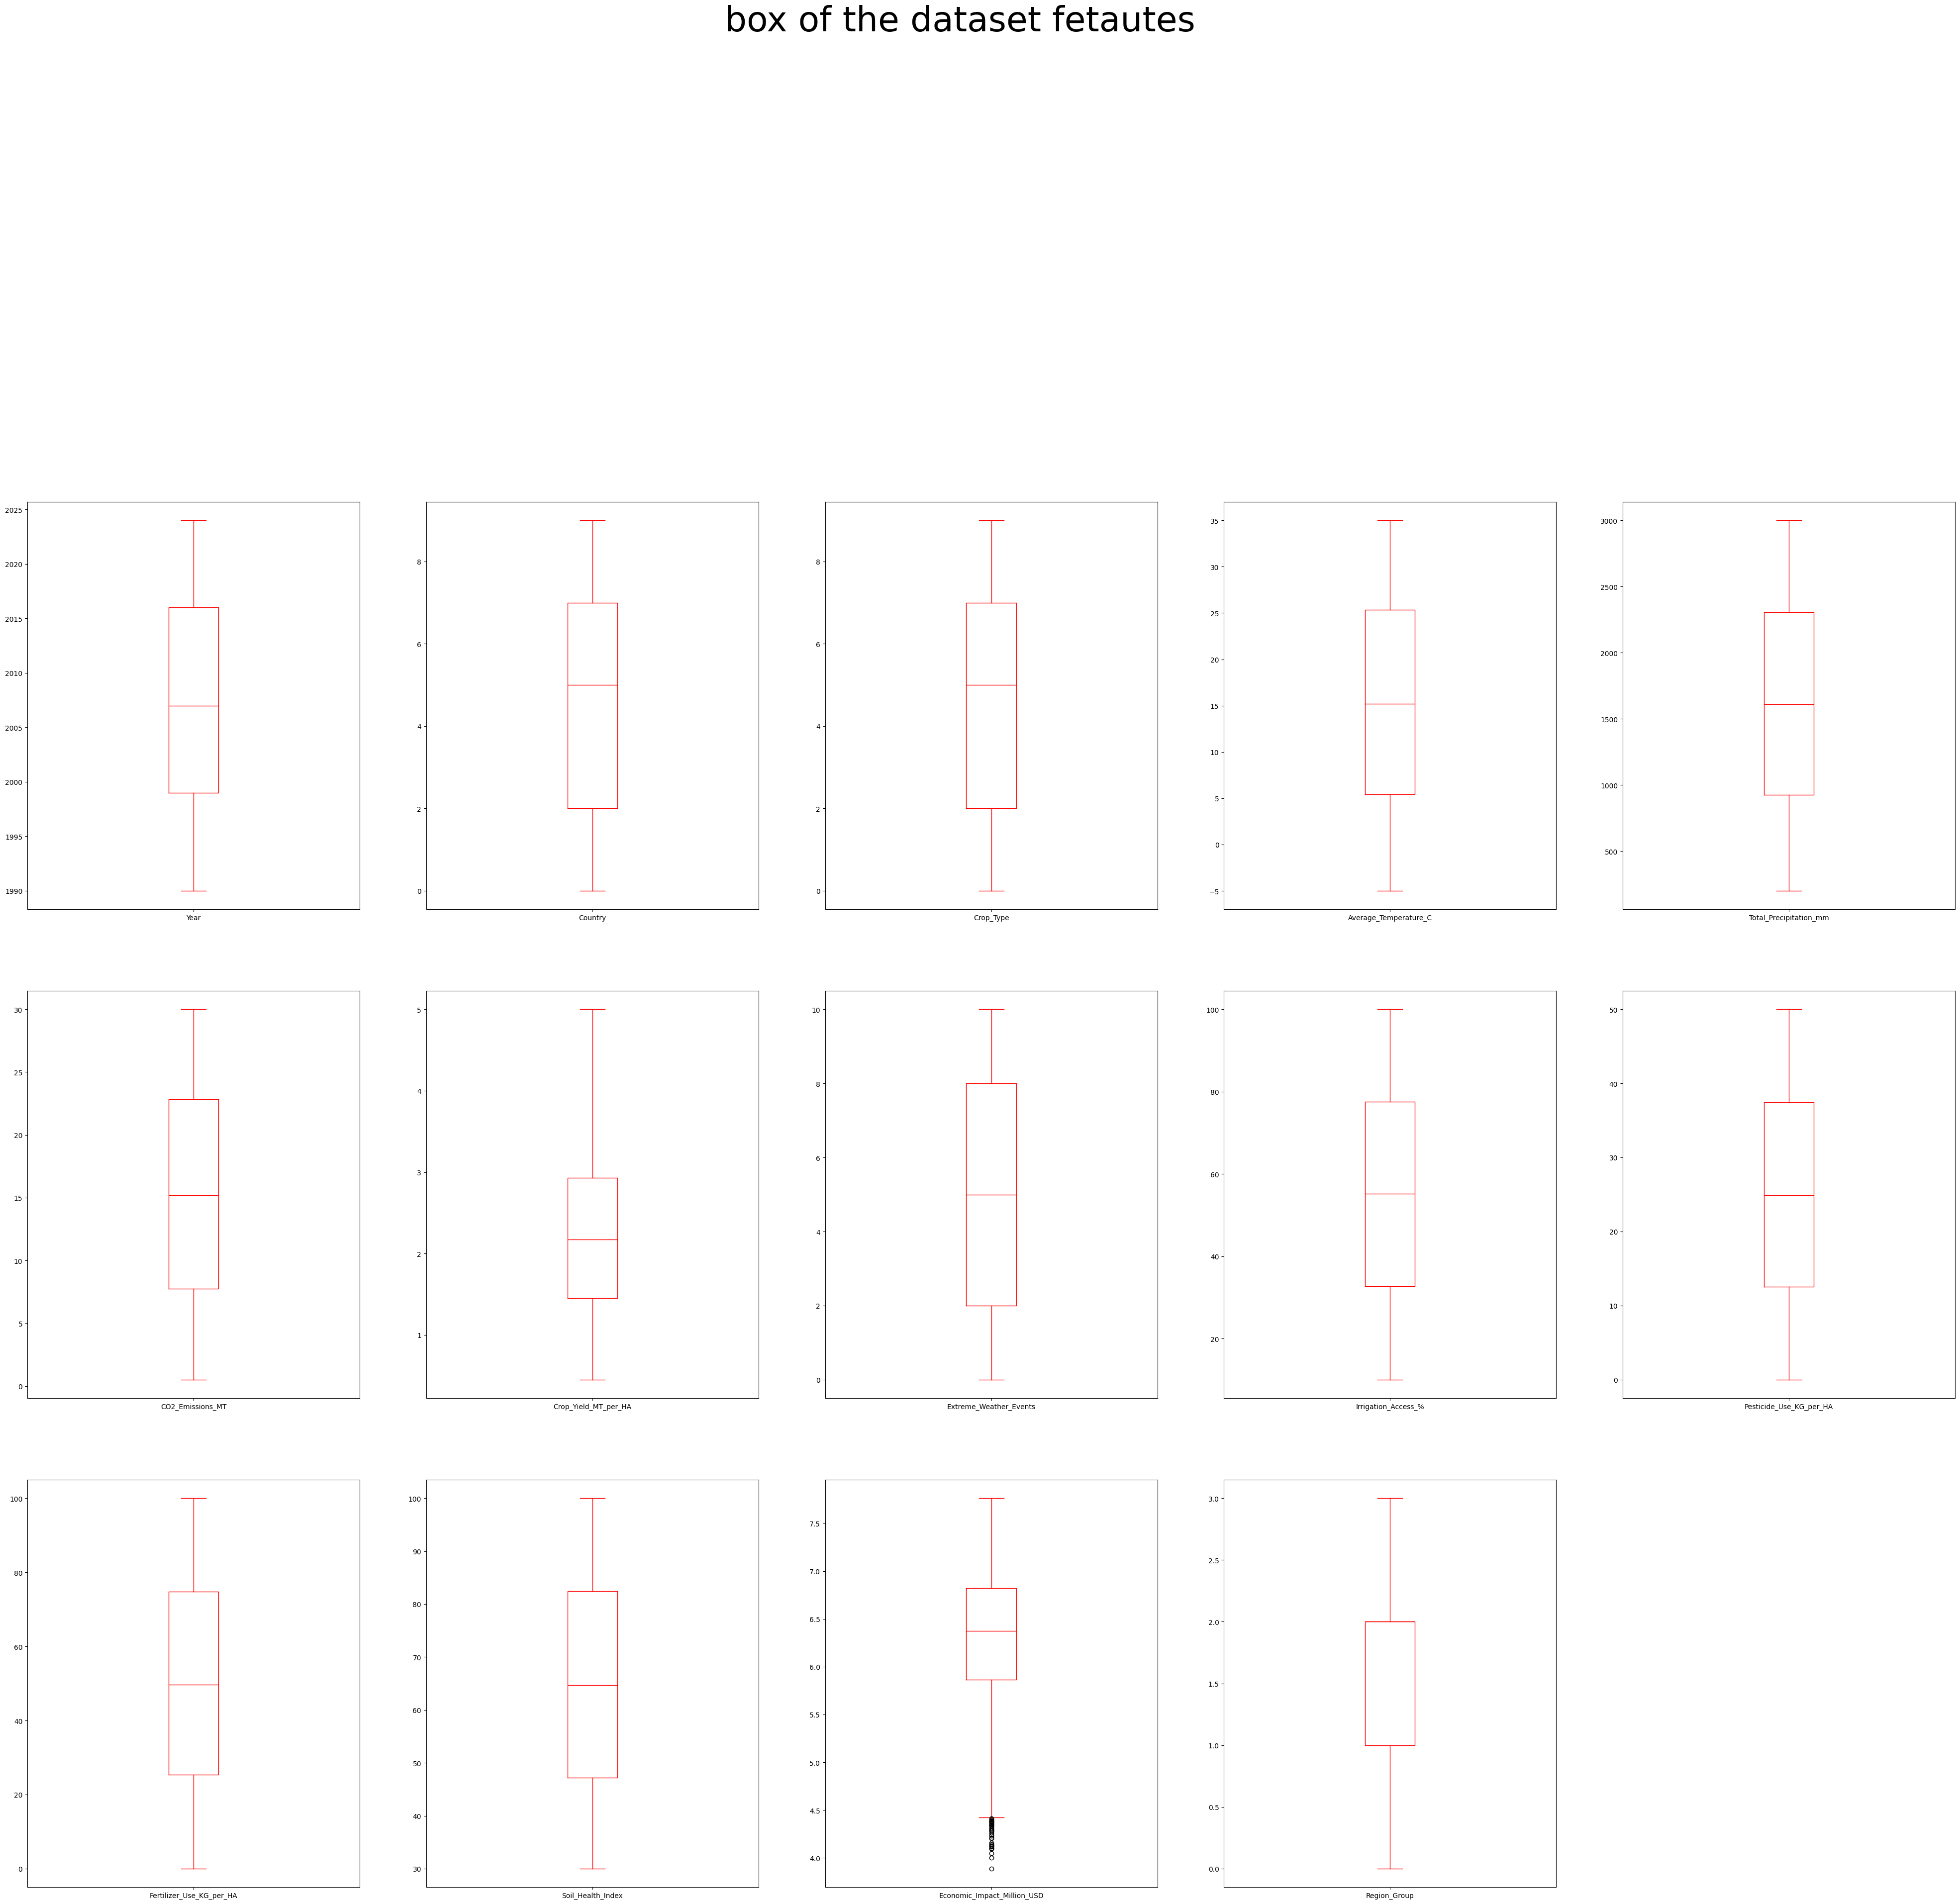

In [ ]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='r')
plt.suptitle('box of the dataset fetautes', fontsize=50)
plt.show


## handel outliers


In [ ]:
Q1 = df['Economic_Impact_Million_USD'].quantile(0.25)
Q3 = df['Economic_Impact_Million_USD'].quantile(0.75)
IQR = Q3 - Q1

# Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Economic_Impact_Million_USD'] >= lower_bound) & (df['Economic_Impact_Million_USD'] <= upper_bound)]

### model building

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Optional: XGBoost
# !pip install xgboost
from xgboost import XGBRegressor 

# Load dataset
 # replace with your CSV path

# Inspect columns


# -------------------------------
# 1. Split features and target
# -------------------------------
# Assuming 'Crop_Yield' is your target column
X = df.drop('Crop_Yield_MT_per_HA', axis=1)
y = df['Crop_Yield_MT_per_HA']

# -------------------------------
# 2. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Scale features (target not scaled)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 4. Train models
# -------------------------------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# -------------------------------
# 5. Evaluate models
# -------------------------------
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")


Linear Regression -> MSE: 0.44, R2: 0.55
Random Forest -> MSE: 0.38, R2: 0.61
XGBoost -> MSE: 0.39, R2: 0.60


In [ ]:

models={'Linear_Regression':LinearRegression(),
        'RandomForest_Regressor':RandomForestRegressor(),
        'GradientBoosting_Regressor':GradientBoostingRegressor(),
        'DecisionTree_Regressor':DecisionTreeRegressor(),
        'svm':SVR(),
        #'MLP_Regressor':MLPRegressor(max_iter=500)
        'AdaBoostRegressor':AdaBoostRegressor(),
        'ExtraTreesClassifier':ExtraTreesRegressor(),
        'BaggingRegressor':BaggingRegressor(),
        # 'LGBMRegressor':LGBMRegressor(),
        #'CatBoostRegressor':Ca
}
result={'model':[],"MSE":[],"MAE":[],'R2':[]}

for model_name,model in models.items():
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    
    result['model'].append(model_name)
    result['MSE'].append(mse)
    result['MAE'].append(mae)
    result['R2'].append(r2)
result_df=pd.DataFrame(result)

result_df=result_df.sort_values(by='MSE',ascending=True) 

result_df.style.background_gradient('Blues') 

,model,MSE,MAE,R2
2,GradientBoosting_Regressor,0.367512,0.487014,0.626200
1,RandomForest_Regressor,0.382120,0.496717,0.611342
6,ExtraTreesClassifier,0.387702,0.501310,0.605665
5,AdaBoostRegressor,0.392251,0.513289,0.601038
7,BaggingRegressor,0.411392,0.508512,0.581569
0,Linear_Regression,0.442505,0.538554,0.549924
3,DecisionTree_Regressor,0.710995,0.637035,0.276841
4,svm,0.962830,0.812328,0.020696


### Model Hyperparameter Tuning

In [ ]:
# =====================================================
# CROP YIELD PREDICTION – ALL MODELS WITH HYPERPARAMETER
# =====================================================

import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ---------- 1. Load Dataset ----------
   # change filename if needed

# X = df.drop('Yield', axis=1)
# y = df['Yield']

# ---------- 2. Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------- 3. Feature Scaling ----------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------- 4. Models & Hyperparameters ----------
models = {
    "Linear Regression": (LinearRegression(), {}),
    
    "Ridge Regression": (
        Ridge(),
        {"alpha": [0.1, 1, 10]}
    ),
    
    "Lasso Regression": (
        Lasso(),
        {"alpha": [0.01, 0.1, 1]}
    ),
    
    "KNN Regression": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [3,5,7,9],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    ),
    
    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {
            "max_depth": [5,10,None],
            "min_samples_split": [2,5,10],
            "min_samples_leaf": [1,2,4]
        }
    ),
    
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [100,200],
            "max_depth": [5,10,None],
            "min_samples_split": [2,5],
            "min_samples_leaf": [1,2]
        }
    ),
    
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100,200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3,5],
            "subsample": [0.8, 1.0]
        }
    )
}

# ---------- 5. Training & Evaluation ----------
results = {}

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    if params:
        grid = GridSearchCV(
            model,
            params,
            cv=5,
            scoring='r2',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Model": best_model
    }

# ---------- 6. Results Comparison ----------
print("\nMODEL COMPARISON")
print("="*60)

best_model_name = None
best_r2 = -1

for name, metrics in results.items():
    print(f"\n{name}")
    print("R2   :", metrics["R2"])
    print("MAE  :", metrics["MAE"])
    print("RMSE :", metrics["RMSE"])
    
    if metrics["R2"] > best_r2:
        best_r2 = metrics["R2"]
        best_model_name = name

# ---------- 7. Save Best Model ----------
best_model = results[best_model_name]["Model"]

with open("best_crop_yield_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nBEST MODEL SELECTED:", best_model_name)
print("Model and scaler saved successfully!")



Training Linear Regression...

Training Ridge Regression...

Training Lasso Regression...

Training KNN Regression...

Training Decision Tree...

Training Random Forest...

Training Gradient Boosting...

MODEL COMPARISON

Linear Regression
R2   : 0.5499240450003793
MAE  : 0.5385544105262685
RMSE : 0.6652104775141141

Ridge Regression
R2   : 0.5499352847953543
MAE  : 0.5385066705470134
RMSE : 0.6652021712760448

Lasso Regression
R2   : 0.5522965405585369
MAE  : 0.5374556294559985
RMSE : 0.663454891376415

KNN Regression
R2   : 0.43467747549202074
MAE  : 0.6056255148498537
RMSE : 0.7455286197477395

Decision Tree
R2   : 0.614904717501616
MAE  : 0.494463272258291
RMSE : 0.6153189275376492

Random Forest
R2   : 0.6238144034873412
MAE  : 0.4897729809001875
RMSE : 0.6081591661210486

Gradient Boosting
R2   : 0.626690346789033
MAE  : 0.4874736295027927
RMSE : 0.6058300139990712

BEST MODEL SELECTED: Gradient Boosting
Model and scaler saved successfully!


# 📘 FINAL PROJECT REPORT  
## Climate Change Impact on Agriculture – Machine Learning Analysis

---

## 1️⃣ Introduction

This project analyzes the impact of climate change on agriculture across multiple countries and regions.  
The dataset includes information about crop types, geographical regions, and climate adaptation strategies,  
with the goal of building an accurate machine learning model for prediction.

---

## 2️⃣ Dataset Overview

### Dataset Characteristics
- Multinational agricultural data  
- Mix of categorical and numerical features  
- Suitable for regression-based machine learning models  

### Key Categorical Columns
- Country  
- Region  
- Crop_Type  
- Adaptation_Strategies  

---

## 3️⃣ Data Quality Check

### 🔹 Missing Values
- A complete null value check was performed across all columns  
- No missing or null values were found in the dataset  

✅ **Conclusion:** Dataset is clean and does not require imputation.

---

## 4️⃣ Outlier Analysis

### 🔹 Method Used 
- Boxplot visualization  

### 🔹 Results
- Outliers in the economic column were detected and handled using the IQR method.

- Other data distributions were consistent with real-world agricultural and climate data.

---

## 5️⃣ Categorical Feature Analysis

### Ordinal vs Nominal Classification

| Column                  | Type     | Reason                  |
|-------------------------|----------|-------------------------|
| Country                 | Nominal  | No inherent ranking     |
| Region                  | Nominal  | Geographical labels     |
| Crop_Type               | Nominal  | Crop categories         |
| Adaptation_Strategies   | Nominal  | No defined order        |

📌 **Ordinal Columns Identified:** None (0)

---

## 6️⃣ Feature Encoding

Since all categorical variables are nominal, the following encoding strategy was used:

### ✅ One-Hot Encoding
```python
df_encoded = pd.get_dummies(df, drop_first=True)

## 7️⃣ Problem Type & Target Variable

- **Problem Type:** Regression  
- **Target Variable:** Crop_Yield_MT_per_HA  Crop production in metric tons per hectare (target variable for prediction/analysis).</li>

---

## 8️⃣ Model Building & Comparison

### Models Evaluated
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

### Model Evaluation Metrics
- R² Score
- MSE,MAE

---

## 9️⃣ Best Model Selection

🏆 **Final Model:** Gradient Boosting Regressor

### Why Gradient Boosting?
- Learns complex non-linear patterns
- Sequentially reduces prediction errors
- Handles feature interactions effectively
- Produces stable cross-validation performance
- Less prone to overfitting compared to standalone decision trees


### deploy the code using gradio

In [ ]:
import pickle
model=GradientBoostingRegressor(random_state=0,learning_rate=0.45)
model.fit(X_train,y_train)
with open ('climate.pkl','wb') as file:
    pickle.dump(model,file)
    

In [ ]:
import pickle
import numpy as np
import gradio as gr

# ======================
# Load model
# ======================
with open("climate.pkl", "rb") as f:
    model = pickle.load(f)

# ======================
# Encoding Maps (MUST match training)
# ======================
country_map = {
    "Argentina": 0,
    "Australia": 1,
    "Brazil": 2,
    "Canada": 3,
    "China": 4,
    "France": 5,
    "India": 6,
    "Nigeria": 7,
    "Russia": 8,
    "USA": 9
}

region_group_map = {
    "East": 0,
    "North": 1,
    "South": 2,
    "West": 3
}

crop_map = {
    "Barley": 0,
    "Coffee": 1,
    "Corn": 2,
    "Cotton": 3,
    "Fruits": 4,
    "Rice": 5,
    "Soybeans": 6,
    "Sugarcane": 7,
    "Vegetables": 8,
    "Wheat": 9
}

# ======================
# Prediction Function
# ======================
def predict_crop_yield(
    Year,
    Country,
    Region_Group,
    Crop_Type,
    Average_Temperature_C,
    Total_Precipitation_mm,
    CO2_Emissions_MT,
    Extreme_Weather_Events,
    Irrigation_Access_percent,
    Pesticide_Use_KG_per_HA,
    Fertilizer_Use_KG_per_HA,
    Soil_Health_Index,
    Economic_Impact_Million_USD,
    Adaptation_Strategy
):
    try:
        # Encode categorical values
        Country = country_map[Country]
        Region = region_group_map[Region_Group]
        Crop_Type = crop_map[Crop_Type]

        # One-hot encode adaptation strategy
        drought = 1 if Adaptation_Strategy == "Drought-resistant Crops" else 0
        no_adapt = 1 if Adaptation_Strategy == "No Adaptation" else 0
        organic = 1 if Adaptation_Strategy == "Organic Farming" else 0
        water = 1 if Adaptation_Strategy == "Water Management" else 0

        # Feature array (ORDER MATTERS)
        X = np.array([[  
            Year,
            Country,
            Region_Group,
            Crop_Type,
            Average_Temperature_C,
            Total_Precipitation_mm,
            CO2_Emissions_MT,
            Extreme_Weather_Events,
            Irrigation_Access_percent,
            Pesticide_Use_KG_per_HA,
            Fertilizer_Use_KG_per_HA,
            Soil_Health_Index,
            Economic_Impact_Million_USD,
            drought,
            no_adapt,
            organic,
            water
        ]], dtype=float)

        pred = model.predict(X)[0]
        return f"🌾 Predicted Crop Yield: {pred:.2f} MT per HA"

    except Exception as e:
        return f"❌ Error: {e}"

# ======================
# UI (TEXT VALUES ONLY)
# ======================
inputs = [
    gr.Number(label="Year", value=2020),

    gr.Dropdown(list(country_map.keys()), label="Country"),
    gr.Dropdown(list(region_group_map.keys()), label="Region"),
    gr.Dropdown(list(crop_map.keys()), label="Crop Type"),

    gr.Number(label="Average Temperature (°C)", value=15),
    gr.Number(label="Total Precipitation (mm)", value=1200),
    gr.Number(label="CO₂ Emissions (MT)", value=20),
    gr.Number(label="Extreme Weather Events", value=5),
    gr.Slider(0, 100, value=60, label="Irrigation Access (%)"),
    gr.Number(label="Pesticide Use (KG/HA)", value=25),
    gr.Number(label="Fertilizer Use (KG/HA)", value=50),
    gr.Slider(0, 100, value=70, label="Soil Health Index"),
    gr.Number(label="Economic Impact (Million USD)", value=500),

    gr.Dropdown(
        ["Drought-resistant Crops", "No Adaptation", "Organic Farming", "Water Management"],
        label="Adaptation Strategy"
    )
]

# ======================
# Launch App
# ======================
gr.Interface(
    fn=predict_crop_yield,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="🌱 Crop Yield Prediction (MT per HA)",
    description="User-friendly crop yield prediction system (no encoded values shown).",
    theme="soft"
).launch()




* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
